# Bài tập 1: Gradient Descent Heights và Weights
#### Cho tập tin chiều cao heights (heights_1.txt), weights (weights_1.txt)
- Tạo 2 numpy array heights và weights chứa 2 danh sách từ 2 tập tin trên.
- Chuyển heights sang mét (heights*0.0254) và weights sang kg (weights * 0.453592) 
- Trực quan hóa dữ liệu theo heights, weights
- X = heights đã chuyển theo định dạng chuẩn, y = weights 
- Với $y = w_0 + w_1x$ (weights = $w_0$ + $w_1$*heights), gọi hàm gradient_descent tính $w_0$, $w_1$
- Từ $w_0$, $w_1$ $\rightarrow$ dự đoán $\hat{y}$
- Trực quan hóa dữ liệu
- Với chiều cao là 1.8, 1.9, 2.0 thì cân nặng lần lượt là bao nhiêu?

In [37]:
import numpy as np


%config Completer.use_jedi = False

In [38]:
# 1
f = open('data/heights_1.txt')
data = f.read()
f.close()

In [39]:
h = eval(data)
heights = np.array(h)
heights.size

1015

In [40]:
heights = heights*0.0254
heights

array([1.8796, 1.8796, 1.8288, ..., 1.905 , 1.905 , 1.8542])

In [41]:
# 2
f = open('data/weights_1.txt')
data1 = f.read()
f.close()

In [42]:
h = eval(data1)
weights = np.array(h)
weights.size

1015

In [43]:
weights = weights * 0.453592
weights

array([81.64656, 97.52228, 95.25432, ..., 92.98636, 86.18248, 88.45044])

In [44]:
# 3
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x800 with 0 Axes>

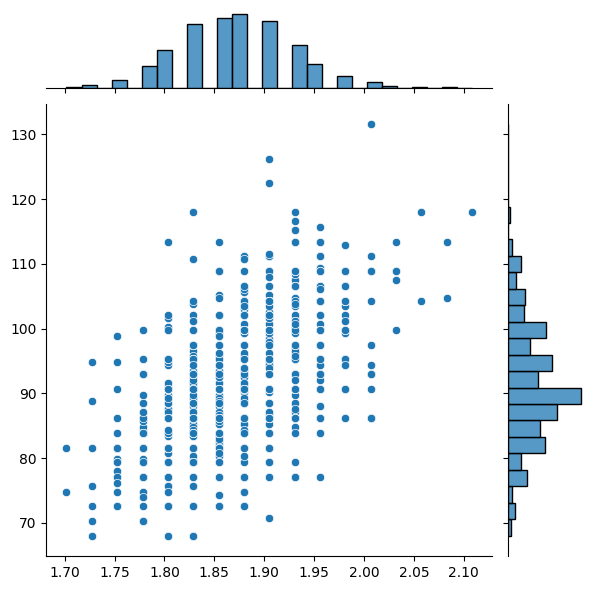

In [45]:
plt.figure(figsize=(12,8))
sns.jointplot(x=heights, y = weights)
plt.show()

In [46]:
np.corrcoef(heights, weights) # tương quan yếu

array([[1.        , 0.53153932],
       [0.53153932, 1.        ]])

In [47]:
# 4
X = heights
y = weights

In [48]:
# 5
def gradient_descent(alpha, x, y, numIterations):
    # input:
    # alpha: learning rate
    # x là mẫu: x = [[x0],[x1], [x2], ...]
    # y là mẫu: y = [y0, y1, y2, ...]
    # numIterations: số lần lặp cho trước
    
    #Bước 0: chuẩn bị
    m = X.shape[0] # số dòng
    Xbar = np.c_[np.ones(m),x]
    w = np.ones(2)
    
    # Bước 1: vòng lặp
    for iter in range(numIterations):
        error = Xbar.dot(w) - y
        diff_w0 = sum(error) / m
        diff_w1 = sum(error*x)/m
        
        gradient = np.array([diff_w0, diff_w1])
        w =  w - alpha * gradient
    return w

In [49]:
alpha = 0.01
w = gradient_descent(alpha, X, y, 1000)

In [50]:
w

array([19.96584533, 38.16395791])

In [51]:
# 6
yhat = w[0] + w[1] *X
yhat

array([91.69882062, 91.69882062, 89.76009156, ..., 92.66818515,
       92.66818515, 90.72945609])

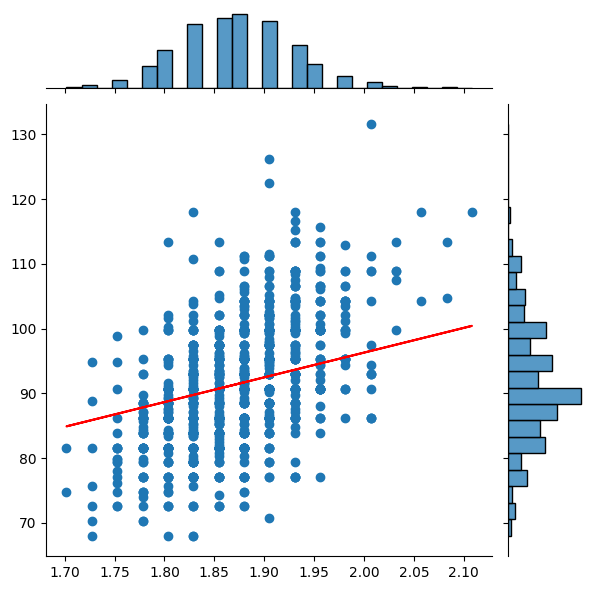

In [54]:
# 7
sns.jointplot(x=heights, y = weights)
plt.scatter(X,y)
plt.plot(X, yhat, c='r')
plt.show()

In [55]:
# 8
new_height = np.array([1.8,1.9,2.0])
new_weight = w[0] + w[1]*new_height
new_weight

array([88.66096957, 92.47736536, 96.29376116])